# Import necessary python library
  

In [1]:
import zipfile
import pandas as pd
import numpy as np
from zipfile import ZipFile

# specifying the zip file name

In [2]:

file_name = "Stress_dataset.zip"
  

In [3]:
# Extract the files from the zipped folder
with zipfile.ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

# extracting all the files
print('Extracting all the files now...')
print('Done!')


File Name                                             Modified             Size
15/                                            2021-09-06 11:51:56            0
15/15_1594140175.zip                           2021-09-06 11:01:26      2274410
15/15_1594149654.zip                           2021-09-06 11:01:26       594814
15/15_1594213322.zip                           2021-09-06 11:01:26      1639127
15/15_1594220239.zip                           2021-09-06 11:01:26      4293942
15/15_1594238057.zip                           2021-09-06 11:01:26       845599
15/15_1594298975.zip                           2021-09-06 11:01:26      3461722
15/15_1594311202.zip                           2021-09-06 11:01:26      4185452
15/15_1594325201.zip                           2021-09-06 11:01:26      1707364
15/15_1594378283.zip                           2021-09-06 11:01:26       295830
15/15_1594380033.zip                           2021-09-06 11:01:26      2750887
15/15_1595334888.zip                    

# Extract the data  from the zipped folder

In [4]:
data=pd.read_excel('SurveyResults.xlsx')

# Print the first 5 rows of the dataset

In [5]:
print('--- First 5 rows of the dataset ---')
print(data.head())

--- First 5 rows of the dataset ---
   ID Start time  End time  duration       date Stress level COVID related  \
0  5C   08:00:00  09:00:00  01:00:00 2020-04-15            1             0   
1  5C   17:31:00  17:58:00  00:27:00 2020-04-14            1             0   
2  E4   15:32:00  15:37:00  00:05:00 2020-04-18            2             0   
3  E4   14:05:00  14:11:00  00:06:00 2020-04-18            2             0   
4  7A   13:52:00  14:03:00  00:11:00 2020-04-18            2             0   

  Treating a covid patient Patient in Crisis Patient or patient's family  \
0                        1                 0                           1   
1                        1                 0                           1   
2                        1                 0                           1   
3                        0                 0                           1   
4                        1                 0                           0   

  Doctors or colleagues  \
0          

# Explore the dataset by checking its shape, data types, and basic statistics:

In [6]:
print('\n--- Shape of the dataset ---')
print(data.shape)



--- Shape of the dataset ---
(358, 20)


In [7]:
print(data.dtypes)


ID                                                                                  object
Start time                                                                          object
End time                                                                            object
duration                                                                            object
date                                                                        datetime64[ns]
Stress level                                                                        object
COVID related                                                                       object
Treating a covid patient                                                            object
Patient in Crisis                                                                   object
Patient or patient's family                                                         object
Doctors or colleagues                                                               object

In [8]:
# print(data.describe())
print(data.describe(datetime_is_numeric=True))


                                date
count                            358
mean   2020-07-24 13:40:33.519553024
min              2020-04-14 00:00:00
25%              2020-06-25 00:00:00
50%              2020-07-07 00:00:00
75%              2020-07-27 00:00:00
max              2020-12-13 00:00:00


In [9]:
data.drop('Lack of supplies', axis=1, inplace=True)

# check for missing values 

# drop rows with missing values

In [10]:
data.dropna(inplace=True)



In [11]:
print(data)

     ID Start time  End time  duration       date Stress level COVID related  \
0    5C   08:00:00  09:00:00  01:00:00 2020-04-15            1             0   
1    5C   17:31:00  17:58:00  00:27:00 2020-04-14            1             0   
2    E4   15:32:00  15:37:00  00:05:00 2020-04-18            2             0   
3    E4   14:05:00  14:11:00  00:06:00 2020-04-18            2             0   
4    7A   13:52:00  14:03:00  00:11:00 2020-04-18            2             0   
..   ..        ...       ...       ...        ...          ...           ...   
353  83   23:05:00  23:50:00  00:45:00 2020-12-12            2             0   
354  83   00:12:00  02:01:00  01:49:00 2020-12-13            2             0   
355  83   20:34:00  20:48:00  00:14:00 2020-12-11            2             0   
356  83   20:54:00  21:13:00  00:19:00 2020-12-11            2             0   
357  BG   19:20:00  19:38:00  00:18:00 2020-12-11            2             0   

    Treating a covid patient Patient in

In [12]:
# There are no missing values, so here can move on to the next step

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Explore the distribution of the 'Stress level' column
print(data['Stress level'].describe())

count     358
unique      4
top         2
freq      179
Name: Stress level, dtype: int64


# convert 'Stress level' column to float

In [15]:
# replace 'na' values with NaN
data['Stress level'] = pd.to_numeric(data['Stress level'], errors='coerce')


In [16]:
data

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1.0,0,1,0,1,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1.0,0,1,0,1,0,0,1,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2.0,0,1,0,1,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2.0,0,0,0,1,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2.0,0,1,0,0,0,0,1,0,0,0,0,1,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,83,23:05:00,23:50:00,00:45:00,2020-12-12,2.0,0,0,0,0,0,0,0,0,0,0,0,0,na
354,83,00:12:00,02:01:00,01:49:00,2020-12-13,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na
355,83,20:34:00,20:48:00,00:14:00,2020-12-11,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na
356,83,20:54:00,21:13:00,00:19:00,2020-12-11,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na


# Explore the correlation between different signals and the 'Stress level' column

In [17]:
print(data.corr(numeric_only=True)['Stress level'])
# print(data.corr()['Stress level'], numeric_only=True)


Stress level    1.0
Name: Stress level, dtype: float64


In [18]:
# compute correlation matrix
corr_matrix = data.corr(numeric_only=True)


# Identify signals that might be better candidates for predicting stress

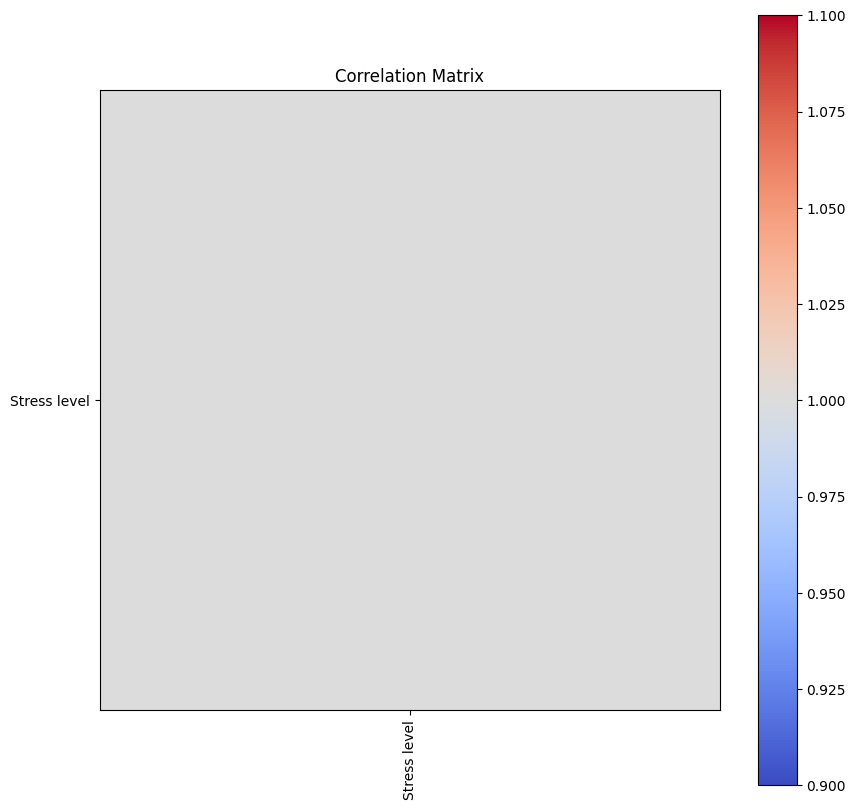

In [19]:
correlations = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)

In [20]:
train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index)

# Print the shape of the training and testing sets

In [21]:
print('\n--- Shape of the training set ---')
print(train.shape)
print('\n--- Shape of the testing set ---')
print(test.shape)




--- Shape of the training set ---
(286, 19)

--- Shape of the testing set ---
(72, 19)


# Create a subset for testing

In [22]:
test_size = 0.2
test_data = data.sample(frac=test_size, random_state=1)
train_data = data.drop(test_data.index)

# Preview the data set

In [23]:
print(train_data.head())

   ID Start time  End time  duration       date  Stress level COVID related  \
0  5C   08:00:00  09:00:00  01:00:00 2020-04-15           1.0             0   
1  5C   17:31:00  17:58:00  00:27:00 2020-04-14           1.0             0   
2  E4   15:32:00  15:37:00  00:05:00 2020-04-18           2.0             0   
3  E4   14:05:00  14:11:00  00:06:00 2020-04-18           2.0             0   
7  E4   08:15:00  08:24:00  00:09:00 2020-04-18           2.0             0   

  Treating a covid patient Patient in Crisis Patient or patient's family  \
0                        1                 0                           1   
1                        1                 0                           1   
2                        1                 0                           1   
3                        0                 0                           1   
7                        0                 0                           0   

  Doctors or colleagues  \
0                     0   
1             

In [24]:
print(train_data.columns)

Index(['ID', 'Start time', 'End time', 'duration', 'date', 'Stress level',
       'COVID related', 'Treating a covid patient', 'Patient in Crisis',
       'Patient or patient's family', 'Doctors or colleagues',
       'Administration, lab, pharmacy, radiology, or other ancilliary services\n',
       'Increased Workload', 'Technology related stress', 'Documentation',
       'Competency related stress',
       'Saftey (physical or physiological threats)',
       'Work Environment - Physical or others: work processes or procedures',
       'Description'],
      dtype='object')


In [25]:
features = ['COVID related', 'Treating a covid patient', 'Patient in Crisis', 'Patient or patient\'s family', 'Doctors or colleagues', 'Administration, lab, pharmacy, radiology, or other ancilliary services\n', 'Increased Workload', 'Technology related stress', 'Documentation', 'Competency related stress', 'Saftey (physical or physiological threats)', 'Work Environment - Physical or others: work processes or procedures']


In [26]:
X_train = train_data[features]
y_train = train_data['Stress level']

X_test = test_data[features]
y_test = test_data['Stress level']

print(y_train, y_test)

0      1.0
1      1.0
2      2.0
3      2.0
7      2.0
      ... 
352    2.0
353    2.0
354    2.0
356    2.0
357    2.0
Name: Stress level, Length: 286, dtype: float64 274    NaN
234    2.0
334    0.0
165    0.0
322    2.0
      ... 
272    2.0
122    0.0
318    0.0
59     2.0
12     0.0
Name: Stress level, Length: 72, dtype: float64


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].apply(str)
        data[col] = label_encoder.fit_transform(data[col])

In [29]:
data = data.drop('date', axis=1)

In [30]:
print(y_train.isna().sum())

89


In [31]:
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]


In [32]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
print(y_test.isna().sum())

24


In [34]:
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]


In [44]:
# Make predictions on new data
y_pred = model.predict(X_train)

#print the predicted values
print(y_pred)

[2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2.]


In [45]:
# Evaluate the model on the training set
train_accuracy = model.score(X_train, y_pred)

#print the accuracy
print('training accuracy: {:.2f}%'.format(train_accuracy * 100))

training accuracy: 100.00%


In [51]:
from sklearn.linear_model import LogisticRegression

# Define a range of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

# Try each learning rate and record the train_accuracies
train_accuracies = []
for lr in learning_rates:
    model = LogisticRegression(C=1/lr)
    model.fit(X_train, y_train)
    accuracy = model.score(X_train, y_train)
    train_accuracies.append(accuracy)
    
test_accuracies = []
for lr in learning_rates:
    model = LogisticRegression(C=1/lr)
    model.fit(X_test, y_test)
    accuracy = model.score(X_test, y_test)
    test_accuracies.append(accuracy) 

C:\Users\Tithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


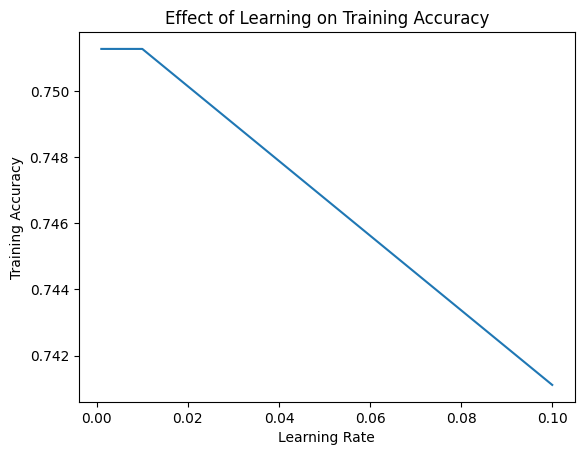

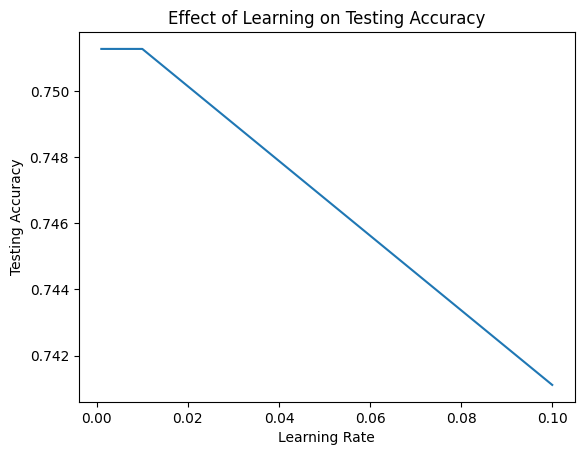

In [52]:
plt.plot(learning_rates, train_accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Training Accuracy')
plt.title('Effect of Learning on Training Accuracy')
plt.show()

plt.plot(learning_rates, train_accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Testing Accuracy')
plt.title('Effect of Learning on Testing Accuracy')
plt.show()

In [53]:
#choose the learning rate that gave th ebest training accuracy
best_lr = 0.01

# Train a new model using the best learning rate and all the training data
model = LogisticRegression(C=1/best_lr)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluate the model's performance on the test set
test_accuracy = model.score(X_test, y_pred)
print('Test Accuracy:', test_accuracy)

# Use the model to make predictions on new, unseen data
# y_pred = model.predict(X_train)

Test Accuracy: 1.0
